<a href="https://colab.research.google.com/github/mingun1204/python_stock/blob/main/html_%EC%9B%B9%EC%8A%A4%ED%81%AC%EB%9E%98%ED%95%91_%EC%A3%BC%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

url='https://finance.naver.com/item/sise_day.naver?code=005930&page=1'

page=requests.get(url)

print(page.text)


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 :: 세상의 모든 지식, 네이버</title>

<style type="text/css">
.error_content * {margin:0;padding:0;}
.error_content img{border:none;}
.error_content em {font-style:normal;}
.error_content {width:410px; margin:80px auto 0; padding:57px 0 0 0; font-size:12px; font-family:"나눔고딕", "NanumGothic", "돋움", Dotum, AppleGothic, Sans-serif; text-align:left; line-height:14px; background:url(https://ssl.pstatic.net/static/common/error/090610/bg_thumb.gif) no-repeat center top; white-space:nowrap;}
.error_content p{margin:0;}
.error_content .error_desc {margin-bottom:21px; overflow:hidden; text-align:center;}
.error_content .error_desc2 {margin-bottom:11px; padding-bottom:7px; color:#888; line-height:18px; border-bottom:1px solid #eee;}
.error_content .error_desc3 {clear:both; color:#888;}
.error_content .error_desc3

<h1>웹 스크래핑 가능 유무 확인하기</h1>

In [ ]:
import requests

url='https://finance.naver.com/item/sise_day.naver?code=005930&page=1'

my_headers={'user-agent':'Mozilla/5.0'}

page=requests.get(url,headers=my_headers)

print(page.text)


<html lang="ko">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버페이 증권</title>

<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230919111844/css/newstock.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230919111844/css/common.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230919111844/css/layout.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230919111844/css/main.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230919111844/css/newstock2.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230919111844/css/newstock3.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230919111844/css/world.css">
</head>
<body>
<script language="Jav

<h1>웹 데이터 수집하기</h1>

In [ ]:
import pandas as pd

pages=pd.read_html(page.text)

type(pages)
print(pages)

In [ ]:
len(pages)

2

In [ ]:
pages[0]

In [ ]:
pages[1]

<h1>페이징 처리가 되어 있는 데이터 수집하기</h1>

In [ ]:
import pandas as pd

new_url='https://finance.naver.com/item/sise_day.naver?code=005930&page='

all_tables = pd.DataFrame()

for page_number in range(1,2):

  full_url=new_url+str(page_number)

  print(f'{page_number} 번째 페이지 읽어오기({full_url})')

  page=requests.get(full_url, headers=my_headers)

  table=pd.read_html(page.text)[0]

  print(f' 전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄 추가')

  all_tables = pd.concat([all_tables,table])


1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=1)
 전체 0 줄에 15 줄 추가


In [1]:
all_tables

NameError: ignored

In [ ]:
all_tables.dropna(inplace=True)

all_tables

<h1>10페이지 데이터 수집하기</h1>

In [ ]:
all_tables=pd.DataFrame()

for page_number in range(1,11):
  full_url=new_url+str(page_number)
  print(f'{page_number}번째 페이지 읽어오기({full_url})')
  page=requests.get(full_url,headers=my_headers)
  table=pd.read_html(page.text)[0]
  print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)}줄 추가')
  all_tables=pd.concat([all_tables,table])

In [ ]:
all_tables.dropna(inplace=True)

all_tables

In [ ]:
all_tables.rename(columns={"날짜":"data",
                          "종가":"end_price",
                          "시가":"start_price",
                          "고가":"highest_price",
                          "저가":"lowest_price"},inplace=True)
all_tables

,data,end_price,전일비,start_price,highest_price,lowest_price,거래량
1,2023.09.22,68800.0,100.0,68300.0,68900.0,68300.0,9420898.0
2,2023.09.21,68900.0,700.0,69200.0,69800.0,68800.0,10796336.0
3,2023.09.20,69600.0,200.0,70000.0,70300.0,69500.0,10873015.0
4,2023.09.19,69800.0,400.0,70400.0,70800.0,69600.0,11820188.0
5,2023.09.18,70200.0,1800.0,71300.0,71700.0,70200.0,16040727.0
...,...,...,...,...,...,...,...
9,2023.05.09,65300.0,600.0,65800.0,65800.0,65100.0,9366861.0
10,2023.05.08,65900.0,800.0,66300.0,66300.0,65400.0,9405365.0
11,2023.05.04,65100.0,300.0,65600.0,65700.0,64700.0,9791064.0
12,2023.05.03,65400.0,300.0,65100.0,65600.0,64900.0,8876749.0


In [ ]:
all_tables.drop(['전일비','거래량'],axis=1,inplace=True)

all_tables

,data,end_price,start_price,highest_price,lowest_price
1,2023.09.22,68800.0,68300.0,68900.0,68300.0
2,2023.09.21,68900.0,69200.0,69800.0,68800.0
3,2023.09.20,69600.0,70000.0,70300.0,69500.0
4,2023.09.19,69800.0,70400.0,70800.0,69600.0
5,2023.09.18,70200.0,71300.0,71700.0,70200.0
...,...,...,...,...,...
9,2023.05.09,65300.0,65800.0,65800.0,65100.0
10,2023.05.08,65900.0,66300.0,66300.0,65400.0
11,2023.05.04,65100.0,65600.0,65700.0,64700.0
12,2023.05.03,65400.0,65100.0,65600.0,64900.0


In [ ]:
all_tables['midian_price']=(all_tables['highest_price']+all_tables['lowest_price'])/2

all_tables

,data,end_price,start_price,highest_price,lowest_price,midian_price
1,2023.09.22,68800.0,68300.0,68900.0,68300.0,68600.0
2,2023.09.21,68900.0,69200.0,69800.0,68800.0,69300.0
3,2023.09.20,69600.0,70000.0,70300.0,69500.0,69900.0
4,2023.09.19,69800.0,70400.0,70800.0,69600.0,70200.0
5,2023.09.18,70200.0,71300.0,71700.0,70200.0,70950.0
...,...,...,...,...,...,...
9,2023.05.09,65300.0,65800.0,65800.0,65100.0,65450.0
10,2023.05.08,65900.0,66300.0,66300.0,65400.0,65850.0
11,2023.05.04,65100.0,65600.0,65700.0,64700.0,65200.0
12,2023.05.03,65400.0,65100.0,65600.0,64900.0,65250.0


In [ ]:
all_tables['month']=all_tables['data'].str[0:7]

all_tables

,data,end_price,start_price,highest_price,lowest_price,midian_price,month
1,2023.09.22,68800.0,68300.0,68900.0,68300.0,68600.0,2023.09
2,2023.09.21,68900.0,69200.0,69800.0,68800.0,69300.0,2023.09
3,2023.09.20,69600.0,70000.0,70300.0,69500.0,69900.0,2023.09
4,2023.09.19,69800.0,70400.0,70800.0,69600.0,70200.0,2023.09
5,2023.09.18,70200.0,71300.0,71700.0,70200.0,70950.0,2023.09
...,...,...,...,...,...,...,...
9,2023.05.09,65300.0,65800.0,65800.0,65100.0,65450.0,2023.05
10,2023.05.08,65900.0,66300.0,66300.0,65400.0,65850.0,2023.05
11,2023.05.04,65100.0,65600.0,65700.0,64700.0,65200.0,2023.05
12,2023.05.03,65400.0,65100.0,65600.0,64900.0,65250.0,2023.05


In [ ]:
all_tables.set_index('data', inplace=True) #날짜를 색인으로 지정하기

all_tables.sort_index(inplace=True) #날짜 오름차순으로 정렬하기

all_tables

KeyError: ignored

<Axes: xlabel='data'>

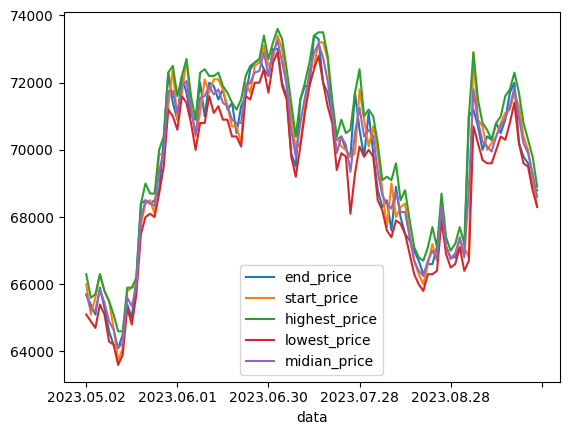

In [ ]:
all_tables.plot.line()

In [ ]:
#303